iris3.csv 파일을이용하여
1. train, test으로 나누어보세요 (test = 20%).
2. 딥러닝 모델을 업데이트 하시고, 베스트 모델을 만들어 보세요.
   (Q0814_iris.hdf5)
3. 그래프로 확인해 보세요.
4. 학습 자동 중단을 설정해 보세요.
5. [5.3, 2.4, 1, 1.3], [7,2.8,5.6,2] 아이리스의 품종을 예측해 보세요

In [1]:
import pandas as pd
df = pd.read_csv('../data/iris3.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.model_selection import train_test_split
# 속성을 X, 클래스를 y로 저장
X = df.iloc[:,0:4]
y = df.iloc[:,4]
# 원-핫 인코딩
y = pd.get_dummies(y)

# 학습셋과 테스트셋을 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim = 4, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# 그래프 확인을 위한 긴 학습
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, verbose = 0, validation_split = 0.25)

# history에 저장된 학습 결과 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.173495,0.444444,1.146733,0.466667
1,1.169365,0.533333,1.142925,0.466667
2,1.165346,0.544444,1.139208,0.433333
3,1.161455,0.577778,1.135618,0.500000
4,1.157694,0.555556,1.132146,0.500000
...,...,...,...,...
1995,0.090759,0.977778,0.033769,1.000000
1996,0.090717,0.977778,0.033745,1.000000
1997,0.090675,0.977778,0.033721,1.000000
1998,0.090634,0.977778,0.033697,1.000000


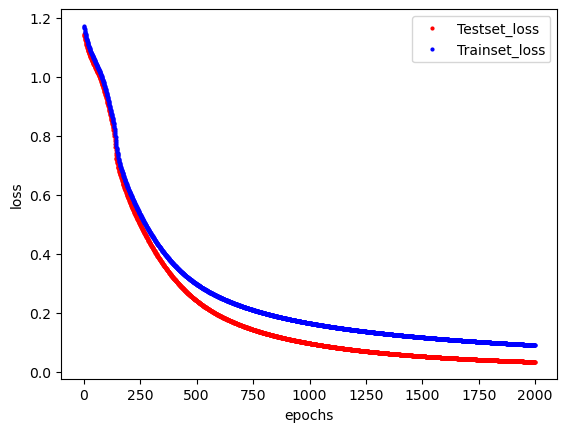

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# y_vloss에 테스트셋(여기에서는 검증셋)의 오차를 저장
y_vloss = hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']
# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, "o", c = 'red', markersize = 2, label = 'Testset_loss')
plt.plot(x_len, y_loss, "o", c = 'blue', markersize = 2, label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
# 학습이 언제 자동 중단될지 설정
# 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습을 종료
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

# 최적화 모델이 저장될 폴더와 모델 이름 지정
modelpath = '../data/model/Q0814_iris.hdf5'

# 최적화 모델을 업데이트하고 저장
# save_best_only 옵션을 True로 지정하여 최고의 모델 하나만 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

# 모델 실행
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
1/1 [==============================] - 0s 150ms/step - loss: 0.0906 - accuracy: 0.9778 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.0905 - accuracy: 0.9778 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - ETA: 0s - loss: 0.0905 - accuracy: 0.9778

c:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 100ms/step - loss: 0.0905 - accuracy: 0.9778 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 4/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.0904 - accuracy: 0.9778 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.0904 - accuracy: 0.9778 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - 0s 99ms/step - loss: 0.0903 - accuracy: 0.9778 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 7/2000
1/1 [==============================] - 0s 101ms/step - loss: 0.0903 - accuracy: 0.9778 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 8/2000
1/1 [==============================] - 0s 101ms/step - loss: 0.0903 - accuracy: 0.9778 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 9/2000
1/1 [==============================] - 0s 106ms/step - loss: 0.0902 - accuracy: 0.9778 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 10/2000
1/1 [==

In [10]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

1/1 [==============================] - 0s 27ms/step - loss: 0.1117 - accuracy: 0.9333
Test accuracy :  0.9333333373069763


In [11]:
# 테스트를 위해 조금 전 사용한 모델을 메모리에서 삭제
del model

In [12]:
# 모델을 새로 불러옴
from tensorflow.keras.models import load_model
model = load_model('../data/model/Q0814_iris.hdf5')

# 불러온 모델을 테스트셋에 적용해 정확도를 구한다
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

1/1 [==============================] - 0s 294ms/step - loss: 0.1115 - accuracy: 0.9333
Test accuracy :  0.9333333373069763


In [13]:
# [5.3, 2.4, 1, 1.3], [7,2.8,5.6,2] 
iris1 = [[5.3, 2.4, 1, 1.3]]
iris2 = [[7,2.8,5.6,2]]
print(np.around(model.predict(iris1)))
print(np.around(model.predict(iris2)))

1/1 [==============================] - 0s 156ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 55ms/step
[[0. 0. 1.]]
